In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from nim.models import Net, generate
from utils import count_arrival

In [4]:
net = Net.load_from_checkpoint("model-1.ckpt")
decoder = net.decoder
n, t = 2000, 1000
x = generate(decoder, size=(n, t))
x = x.numpy().reshape(n, t)
x = np.exp(x.cumsum(axis=1))

In [5]:
t, rate = count_arrival(x, 0.2, max_=100)
rate = rate.mean(axis=0)
true_rate = 0.5 * np.sin(np.pi / 4 * t) + 0.02 * t + 2

Text(0, 0.5, 'Rate')

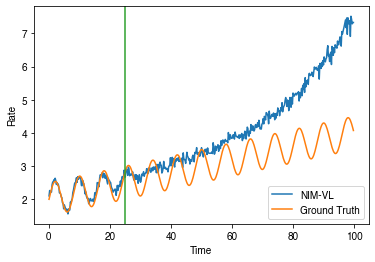

In [6]:
plt.plot(t, rate, label="NIM-VL")
plt.plot(t, true_rate, label="Ground Truth")
plt.axvline(25, c="C2")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Rate")
# plt.savefig("plots/nhpp-with-arima.png", dpi=200)